In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

df=pd.read_csv(r"C:\Users\sripa\OneDrive\Desktop\weather.csv")
df.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


In [21]:
 # from sklearn.preprocessing import LabelEncoder
 le=LabelEncoder()
 df['outlook_n']=le.fit_transform(df['outlook'])
 df['temp_n']=le.fit_transform(df['temperature'])
 df['humidity_n']=le.fit_transform(df['humidity'])
 df['windy_n']=le.fit_transform(df['windy'])
 df['play_n']=le.fit_transform(df['play'])
 df

,outlook,temperature,humidity,windy,play,outlook_n,temp_n,humidity_n,windy_n,play_n
0,overcast,hot,high,False,yes,0,1,0,0,1
1,overcast,cool,normal,True,yes,0,0,1,1,1
2,overcast,mild,high,True,yes,0,2,0,1,1
3,overcast,hot,normal,False,yes,0,1,1,0,1
4,rainy,mild,high,False,yes,1,2,0,0,1
5,rainy,cool,normal,False,yes,1,0,1,0,1
6,rainy,cool,normal,True,no,1,0,1,1,0
7,rainy,mild,normal,False,yes,1,2,1,0,1
8,rainy,mild,high,True,no,1,2,0,1,0
9,sunny,hot,high,False,no,2,1,0,0,0


In [22]:
df=df.drop(['temperature','outlook','humidity','windy','play'],axis=1)
df

,outlook_n,temp_n,humidity_n,windy_n,play_n
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


In [23]:
x=df.iloc[:,:4]
x

,outlook_n,temp_n,humidity_n,windy_n
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


In [24]:
y = df.iloc[:,-1]
y

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play_n, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(9, 4) (5, 4)
(9,) (5,)


In [26]:
# from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [27]:
y_pred=gnb.predict(x_test)

In [28]:
y_pred

array([1, 1, 1, 1, 1])

In [29]:
print(gnb.predict([[2,2,1,0]]))

[1]


C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [30]:
 print(gnb.predict([[2,1,0,1]]))

[0]


C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [31]:
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

print("the accuracy is {}%".format(accuracy*100))
print("the confusion matrix")
print(cm)
print("the classification report")
print(cr)

the accuracy is 60.0%
the confusion matrix
[[0 2]
 [0 3]]
the classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


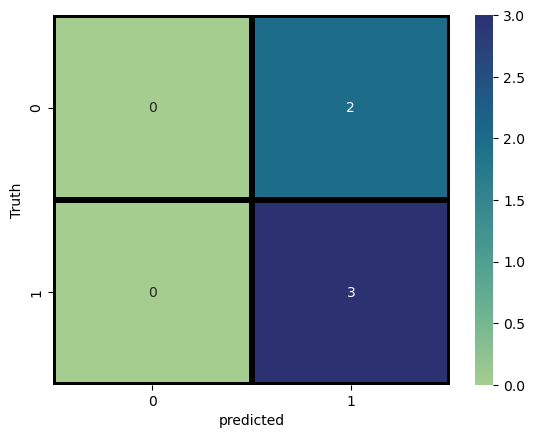

In [35]:

sns.heatmap(cm, annot=True,cmap='crest',linecolor='black',linewidths=4)
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()